### 2022年度プログラミング演習A・B

# 第13回レポート課題の解説

### 演習1（オプション）

$n$ を自然数とし、関数

$$
f(x)=\sin\left(2\pi x^2\right)
$$

の節点

$$
x_i=\frac{i}{n}\quad (i=0,\ldots,n)
$$

における補間多項式を考えます。

$n=3,5,7$ の各場合に連立一次方程式を解くことによって補間多項式の係数を求め、$0\leq x\leq 1$ の範囲で元の関数 $f(x)$ と $3$ 個の補間多項式のグラフを描画してください。

連立一次方程式を解く際には、演算子`\`を使用してよいです。

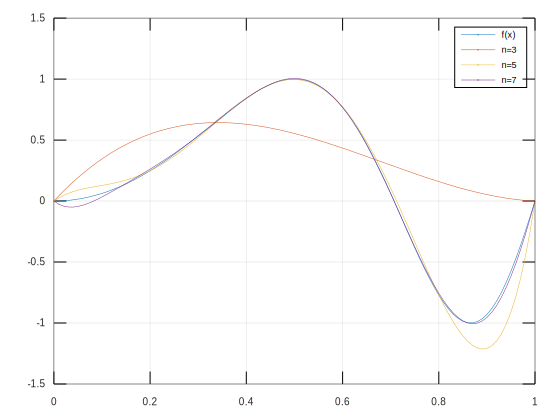

In [1]:
%plot --format svg

function value = f(x)  %f(x)を関数として定義しておく
    value = sin(2*pi*x.^2);
end

x = 0:0.01:1;  %x座標の配列
y = f(x);
plot(x,y,"DisplayName","f(x)")  %f(x)のグラフを描画（凡例ラベルの設定付き）
grid on
hold on

for n = [3,5,7]  %for文でnを変化させる
    node = (0:1/n:1)';  %節点の配列を縦ベクトルとして用意
    A = zeros(n+1);
    for j = 0:n
        A(:,j+1) = node.^j;  %行列Aの各列を計算
    end
    b = f(node);  %縦ベクトルbを定める
    c = A\b;  %連立一次方程式Ac=bを解いて係数ベクトルcを求める
    y = 0;
    for j = 0:n
        y = y+c(j+1)*x.^j;  %補間多項式を計算
    end
    plot(x,y,"DisplayName",["n=",num2str(n)])  %補間多項式のグラフを描画（凡例ラベルの設定付き）
end

legend  %凡例の表示

### 演習2

節点の配列`node`に対して`j`番目のラグランジュ基底多項式の`x`での値を返す関数`Lagrange(node,j,x)`を定義した上で、節点

$$
x_0=0,\quad x_1=\frac{1}{4},\quad x_2=\frac{1}{2},\quad x_3=\frac{3}{4},\quad x_4=1
$$

に対する全てのラグランジュ基底多項式の $0\leq x\leq 1$ の範囲のグラフを描画してください。

なお、関数の引数である`j`の範囲は、`0`～`length(node)-1`と`1`～`length(node)`のどちらで考えてもよいです。

（どうしても難しければ、関数を定義せずにグラフの描画を行ってください。）

関数の引数`j`の範囲を`0`～`length(node)-1`として考えることにすると、コードは次のようになる。

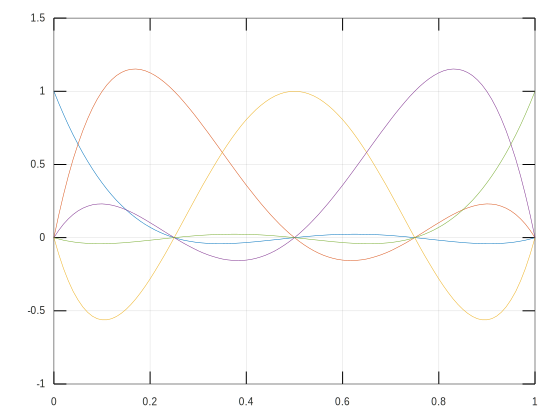

In [2]:
%plot --format svg

function value = Lagrange(node,j,x)
    n = length(node)-1;
    numerator = 1;  %分子
    denominator = 1;  %分母
    %二つのfor文を使ってk=jの場合を除いた計算を行う
    %（一つのfor文で「k = [0:j-1,j+1:n]」とする、
    %　あるいは「k = 0:n」としてif文でk=jの場合にcontinueを使ってもよい）
    for k = 0:j-1
        numerator = numerator.*(x-node(k+1));  %定義に従って分子と分母に因数を掛ける　配列の成分ごとの掛け算は「.」が必要
        denominator = denominator*(node(j+1)-node(k+1));  %数式の添え字と異なり、配列の成分番号は1から始まるために「+1」が必要
    end
    for k = j+1:n
        numerator = numerator.*(x-node(k+1));
        denominator = denominator*(node(j+1)-node(k+1));
    end
    value = numerator/denominator;  %分子/分母を計算して値を返す
end

x = 0:0.01:1;  %x座標の配列
node = 0:1/4:1;  %節点の配列

for j = 0:length(node)-1
    y = Lagrange(node,j,x);  %定義した関数を呼び出して、ラグランジュ基底多項式の値を計算
    plot(x,y)  %ラグランジュ基底多項式のグラフを描画
    grid on
    hold on
end

### 演習3

$n$ を自然数とし、関数

$$
f(x)=\sin\left(2\pi x^2\right)
$$

の節点

$$
x_i=\frac{i}{n}\quad (i=0,\ldots,n)
$$

における補間多項式を考えます。

$n=4,6$ の各場合にラグランジュ補間を用いて補間多項式を求め、$0\leq x\leq 1$ の範囲で元の関数 $f(x)$ と $2$ 個の補間多項式のグラフを描画してください。

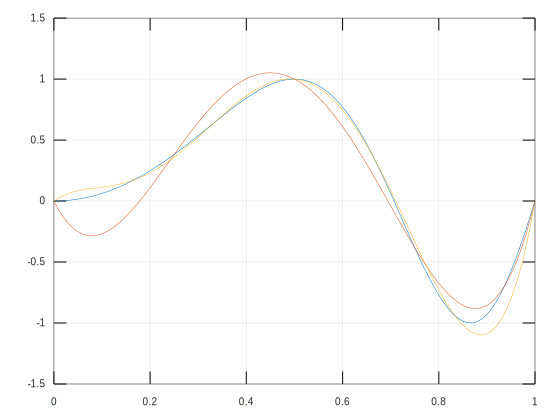

In [3]:
%plot --format svg

function value = f(x)  %f(x)を関数として定義しておく
    value = sin(2*pi*x.^2);
end

x = 0:0.01:1;  %x座標の配列
y = f(x);
plot(x,y)  %f(x)のグラフを描画
grid on
hold on

for n = [4,6]  %for文でnを変化させる
    node = 0:1/n:1;  %節点の配列
    y = 0;
    for j = 0:n
        y = y+f(node(j+1))*Lagrange(node,j,x);  %演習2の関数を利用して、ラグランジュ補間により補間多項式を計算
    end
    plot(x,y)  %補間多項式のグラフを描画
end